In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Q1 = 1
f0 = 400e3
Rs = 50
RL = 83

W0 = 2*np.pi*f0

In [3]:
# para a primeira parte do circuito

R1P = Rs
R1 = R1P * (Q1**2)/(1 + Q1**2)
print(f"R1 : {R1}")

L21_ = R1P/(W0*Q1)
L21  = L21_ / (1+Q1**2)
print(f"L21´ : {L21_}")
print(f"L21  : {L21}")

C1 = 1/(W0**2 * L21_)
print(f"C1   : {C1}")

# test
W0T = 1/np.sqrt(C1*L21_)
print(f"f0 : {W0T/(2*np.pi)}")

R1 : 25.0
L21´ : 1.989436788648692e-05
L21  : 9.94718394324346e-06
C1   : 7.957747154594767e-09
f0 : 400000.00000000006


In [4]:
# para a segunda parte do circuito
Q2 = np.sqrt((RL/R1)-1)
print(f"Q2 : {Q2}")

RL_ = R1
print(f"RL_ : {RL_}")

L22 = Q2*RL_/W0
print(f"L22   : {L22}")

C3_ = 1 / (W0**2 * L22)
print(f"C3´ : {C3_}")

C3 = C3_ * (Q2**2) / (1 + Q2**2)
print(f"C3 : {C3}")


Q2 : 1.5231546211727816
RL_ : 25.0
L22   : 1.5151099190806965e-05
C3´ : 1.0449033924694462e-08
C3 : 7.301734549786492e-09


In [9]:
L2 = L21 + L22
print(f"L2 : {L2}")

L2 : 2.5098283134050425e-05


In [5]:
# test
L2 = L21 + L22

ZL  = ( ( RL/(1j*W0*C3) ) / ( RL + 1/(1j*W0*C3) ) )
ZX  = 1j*W0*L2 + ZL
Zin = ( ( ZX/(1j*W0*C1) ) / ( ZX + 1/(1j*W0*C1) ) )

print(1j*W0*L22 + ZL)
print(Zin)

(24.999999999999996-7.105427357601002e-15j)
(49.999999999999986+1.3642420526593926e-14j)


In [6]:
f = np.logspace(3, 6, 1001)
W = 2*np.pi*f

ZL  = ( ( RL/(1j*W*C3) ) / ( RL + 1/(1j*W*C3) ) )
ZX  = 1j*W*L2 + ZL
Zin = ( ( ZX/(1j*W*C1) ) / ( ZX + 1/(1j*W*C1) ) )

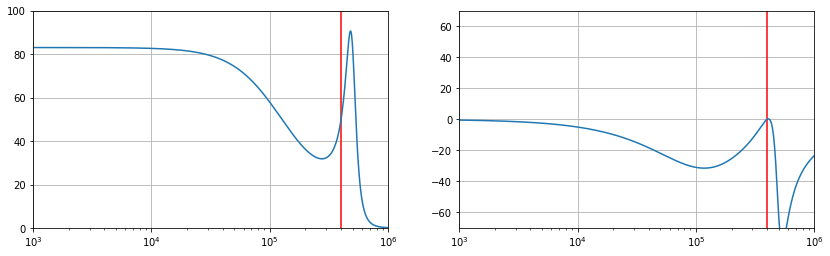

In [7]:
fig = plt.figure(figsize=(14,4))

# visualização da parte real da impedância
plt.subplot(121)
plt.semilogx(f, Zin.real)
plt.vlines(f0, 0, 100, "r")
plt.xlim(1e3,1e6)
plt.ylim(0,1e2)
plt.grid(True)

# visualização da parte imaginária da impedância
plt.subplot(122)
plt.semilogx(f, Zin.imag)
plt.vlines(f0, -70, 70, "r")
plt.xlim(1e3,1e6)
plt.ylim(-70,70)
plt.grid(True)

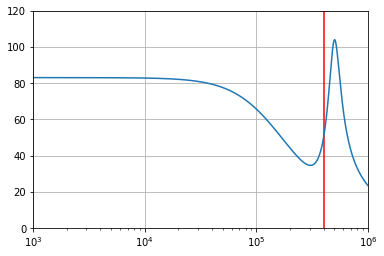

In [8]:
fig = plt.figure(figsize=(6,4))

plt.semilogx(f, np.abs(Zin))
plt.vlines(f0, 0, 120, "r")
plt.xlim(1e3,1e6)
plt.ylim(0,120)
plt.grid(True)